<center><img src="https://cdn.corporate.walmart.com/dims4/WMT/71169a3/2147483647/strip/true/crop/2389x930+0+0/resize/980x381!/quality/90/?url=https%3A%2F%2Fcdn.corporate.walmart.com%2Fd6%2Fe7%2F48e91bac4a8ca8f22985b3682370%2Fwalmart-logos-lockupwtag-horiz-blu-rgb.png" alt="WALMART LOGO" /></center>

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.

## Goals 🎯

The project can be divided into three steps:

- Part 1 : make an EDA and all the necessary preprocessings to prepare data for machine learning
- Part 2 : train a **linear regression model** (baseline)
- Part 3 : avoid overfitting by training a **regularized regression model**

## Scope of this project 🖼️

For this project, you'll work with a dataset that contains information about weekly sales achieved by different Walmart stores, and other variables such as the unemployment rate or the fuel price, that might be useful for predicting the amount of sales. The dataset has been taken from a Kaggle competition, but we made some changes compared to the original data. Please make sure that you're using **our** custom dataset (available on JULIE). 🤓

**Target variable/target (Y) that we will try to predict, to separate from the others** : *Weekly_Sales*



---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [252]:
df = pd.read_csv(r"C:\Users\swell\OneDrive\Bureau\Data_Science_Fullstack\fullstack-data-certification\BLOC_3_ML\walmart\Walmart_Store_sales.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
146,7.0,NaN,716388.81,NaN,20.74,2.778,NaN,NaN
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [253]:
df.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


## Part 1 : EDA & Data Preprocessing
---


Data cleaning and processing :

In [254]:
df['year'] = pd.DatetimeIndex(df['Date'], dayfirst=True).year
df['month'] = pd.DatetimeIndex(df['Date'], dayfirst=True).month
df['day'] = pd.DatetimeIndex(df['Date'], dayfirst=True).day
df['Quarter'] = pd.DatetimeIndex(df['Date'], dayfirst=True).quarter

df = df.sort_values(by ='Date').reset_index(drop=True)
df['Temperature'] = round((df['Temperature'] -32)*5/9,2)

In [255]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Quarter
0,13.0,01-06-2012,2035431.39,0.0,16.17,3.788,130.959226,5.965,2012.0,6.0,1.0,2.0
1,17.0,01-10-2010,829207.27,0.0,15.59,2.853,126.234600,6.885,2010.0,10.0,1.0,4.0
2,10.0,02-03-2012,1990371.02,0.0,14.23,3.882,130.645793,7.545,2012.0,3.0,2.0,1.0
3,7.0,02-04-2010,561145.14,0.0,3.48,2.725,189.704822,8.963,2010.0,4.0,2.0,2.0
4,19.0,02-07-2010,1549018.68,0.0,19.03,2.958,132.521867,8.099,2010.0,7.0,2.0,3.0


In [256]:
print(df.shape)

(150, 12)


Text(0.5, 1.0, 'Relation between Unemployment and Weekly_Sales')

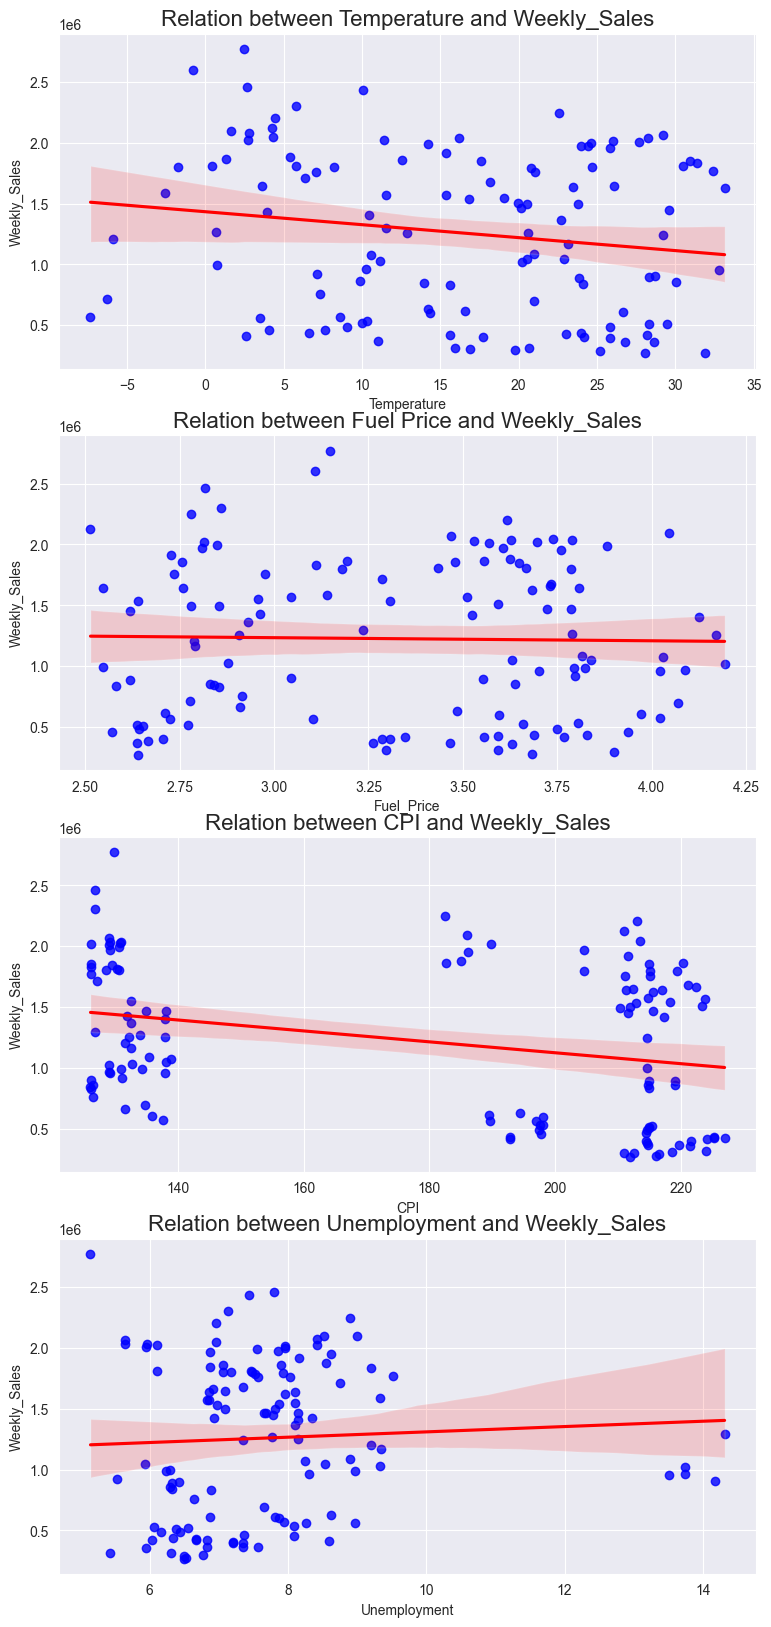

In [257]:
fig,ax =plt.subplots(4,figsize=(9,20))

ax[0] = sns.regplot(data=df, x= 'Temperature', y= 'Weekly_Sales',ax= ax[0], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax[0].set_title("Relation between Temperature and Weekly_Sales",size=16)
ax[1] = sns.regplot(data=df, x= 'Fuel_Price', y= 'Weekly_Sales',ax= ax[1], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax[1].set_title("Relation between Fuel Price and Weekly_Sales",size=16)
ax[2] = sns.regplot(data=df, x= 'CPI', y= 'Weekly_Sales',ax= ax[2], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax[2].set_title("Relation between CPI and Weekly_Sales",size=16)
ax[3] = sns.regplot(data=df, x= 'Unemployment', y= 'Weekly_Sales',ax= ax[3], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

ax[3].set_title("Relation between Unemployment and Weekly_Sales",size=16)

Text(0.5, 1.0, 'Quaterly Sales')

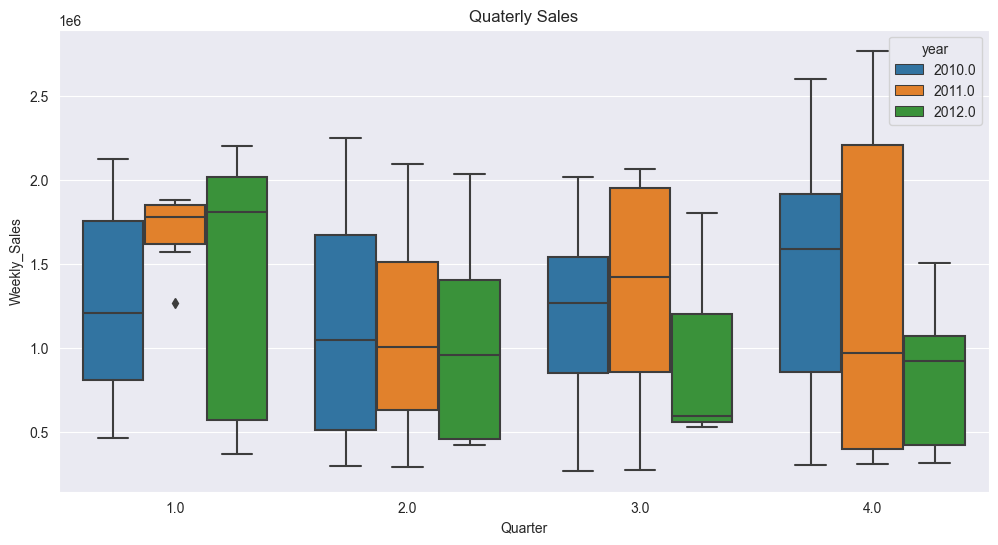

In [258]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.boxplot(data=df,x='Quarter',y= 'Weekly_Sales',hue='year')
ax.set_title("Quaterly Sales")

Text(0.5, 1.0, 'Monthly Sales')

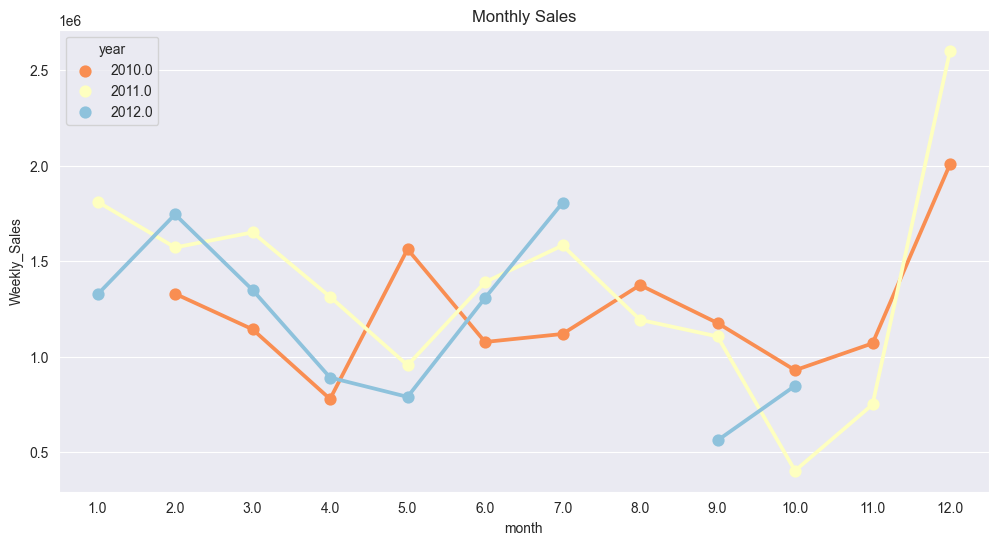

In [259]:
fig,ax = plt.subplots(figsize= (12,6))
ax = sns.pointplot(data=df,x='month',y='Weekly_Sales',hue='year',palette='RdYlBu',errorbar=None)
ax.set_title("Monthly Sales")

In [260]:
# Dropping outliers : defined as 3 times above or below standard deviation in this project, for the following columns.
df['Temperature']=df['Temperature'].apply(lambda x: np.nan if (np.abs(x - df['Temperature'].mean()) / df['Temperature'].std() > 3) else x)
df['Fuel_Price']=df['Fuel_Price'].apply(lambda x: np.nan if (np.abs(x - df['Fuel_Price'].mean()) / df['Fuel_Price'].std() > 3) else x)
df['CPI']=df['CPI'].apply(lambda x: np.nan if (np.abs(x - df['CPI'].mean()) / df['CPI'].std() > 3) else x)
df['Unemployment']=df['Unemployment'].apply(lambda x: np.nan if (np.abs(x - df['Unemployment'].mean()) / df['Unemployment'].std() > 3) else x)

In [261]:
# dropping row if more than 2 features are missing in the same row
df = df.dropna(thresh=6)

print(df.shape)

(148, 12)


In [262]:
df = df.dropna(subset=["Date", "Weekly_Sales"])

In [263]:
#replace nan values in holiday column with 0
df['Holiday_Flag'] = df['Holiday_Flag'].fillna(0)
df['Holiday_Flag'] = df['Holiday_Flag'].map({1:'Yes',0:'No'})


print(df.isna().sum().sort_values())

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
year             0
month            0
day              0
Quarter          0
CPI              9
Temperature     11
Fuel_Price      11
Unemployment    16
dtype: int64


In [264]:
#replace nan values in Temperature, CPI, Unemployment column with mean
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
df['CPI'] = df['CPI'].fillna(df['CPI'].mean())
df['Unemployment'] = df['Unemployment'].fillna(df['Unemployment'].mean())

print(df.isna().sum().sort_values())

Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature      0
CPI              0
Unemployment     0
year             0
month            0
day              0
Quarter          0
Fuel_Price      11
dtype: int64


In [266]:
#make columns store, year, month, day, day_of_week of type integer
df['Store'] = df['Store'].astype(int)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
# df['day_of_week'] = df['day_of_week'].astype(int)
df['Quarter'] = df['Quarter'].astype(int)

In [267]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Quarter
0,13,01-06-2012,2035431.39,No,16.170000,3.788,130.959226,5.965000,2012,6,1,2
1,17,01-10-2010,829207.27,No,15.590000,2.853,126.234600,6.885000,2010,10,1,4
2,10,02-03-2012,1990371.02,No,14.230000,3.882,130.645793,7.545000,2012,3,2,1
3,7,02-04-2010,561145.14,No,3.480000,2.725,189.704822,8.963000,2010,4,2,2
4,19,02-07-2010,1549018.68,No,19.030000,2.958,132.521867,8.099000,2010,7,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
126,5,30-04-2010,298697.84,No,19.740000,NaN,210.939388,7.376775,2010,4,30,2
127,6,30-07-2010,1532308.78,No,15.950935,2.640,212.894485,6.973000,2010,7,30,3
128,19,30-07-2010,1366395.96,No,22.680000,2.932,132.598387,8.099000,2010,7,30,3
129,5,30-07-2010,268929.03,No,28.030000,2.640,211.927001,6.496000,2010,7,30,3


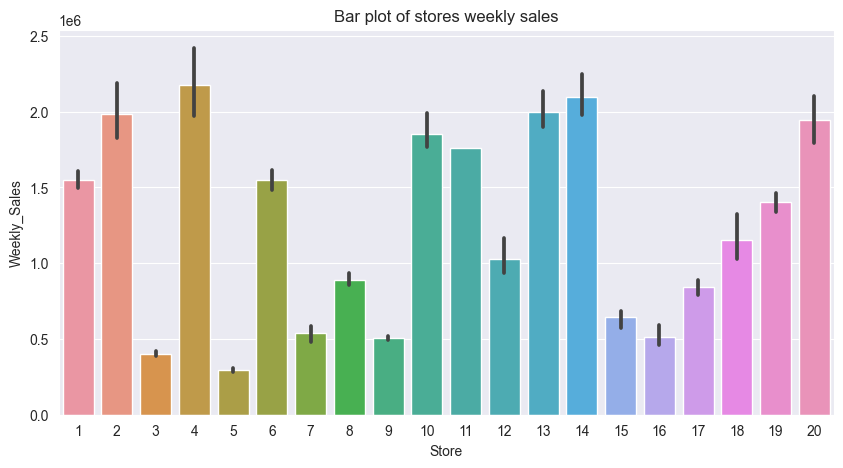

In [268]:
# bar plot of the stores weekly sales
sns.set_style('darkgrid')
plt.figure(figsize = (10, 5))
g = sns.barplot(data = df, x = 'Store', y = 'Weekly_Sales')
g.set_title("Bar plot of stores weekly sales")
plt.show()

<AxesSubplot: >

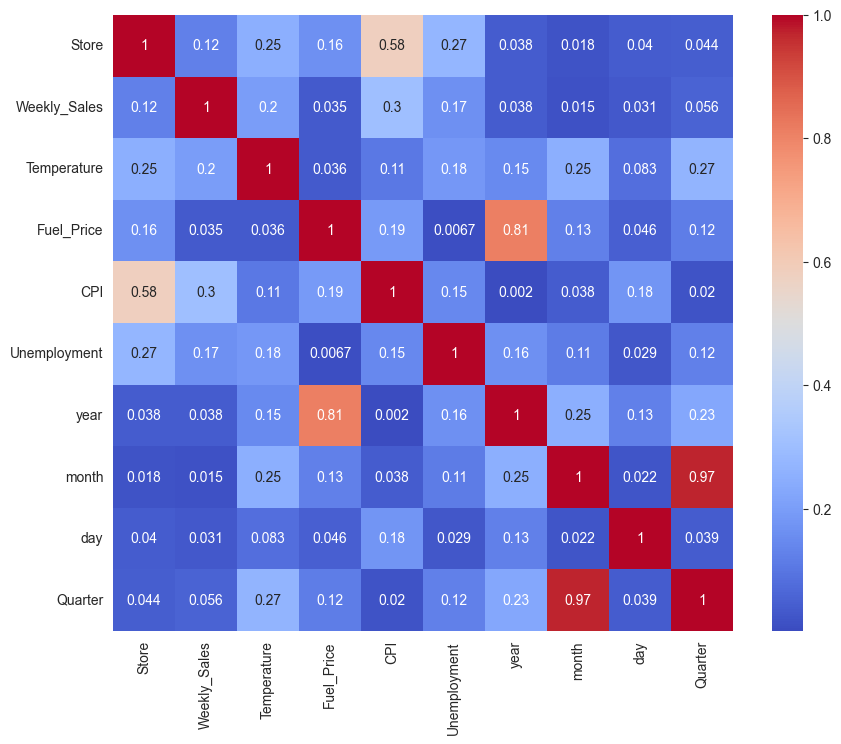

In [269]:
plt.figure(figsize=(10,8))
df_corr=df.corr(numeric_only=True)
sns.heatmap(abs(df_corr),annot=True, cmap='coolwarm')

In [270]:
store_sales = df.groupby("Store")["Weekly_Sales"].sum().reset_index(name="Total_Sales").sort_values(by="Total_Sales",ascending=False)


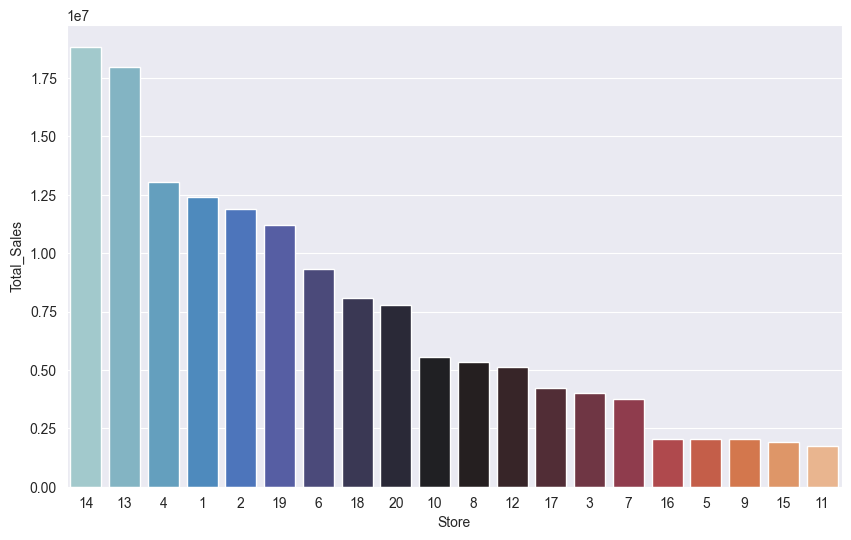

In [271]:
plt.figure(figsize=(10,6))
sns.barplot(x=store_sales['Store'],y=store_sales['Total_Sales'],order=store_sales['Store'], palette='icefire')
plt.show()

In [272]:
print(f"Average total sales for one store is ${round(store_sales['Total_Sales'].mean(),2)} out of {len(store_sales)} stores.")
print(f"50 % of the stores drive {round(store_sales.Total_Sales.iloc[:10].sum()/store_sales.Total_Sales.sum()*100,2)} % of all sales.")

Average total sales for one store is $7417899.73 out of 20 stores.
50 % of the stores drive 78.23 % of all sales.


In [273]:
print(f"Weekly sales around holidays are $ {round(df[df['Holiday_Flag'] == 'Yes']['Weekly_Sales'].mean(),2)}, which is above the average of \
$ {round(df['Weekly_Sales'].mean(),2)}, though the difference is well below standard deviation of $ {round(df['Weekly_Sales'].std(),2)}.")

Weekly sales around holidays are $ 1291931.47, which is above the average of $ 1257271.14, though the difference is well below standard deviation of $ 662505.57.


After the data exploration, we can see that the average total sales for one store is $7417899 out of 45 stores. 50% of the stores drive 78.23% of all sales. Weekly sales around holidays are $1,291,932, which is above the average of $1257271, though the difference is well below standard deviation of $662505.

 The average fuel price is $3.36, with a standard deviation of $0.43. The average CPI is 171.20, with a standard deviation of 39.16. The average unemployment rate is 7.96%, with a standard deviation of 1.86%. The average year is 2010.97, with a standard deviation of 5.78. The average month is 6.50, with a standard deviation of 3.45. The average day is 15.73, with a standard deviation of 8.80. The average day of the week is 3.99, with a standard deviation of 1.99.

## Part 2 : Baseline Linear Regression Model 
---



Let's start with a baseline model. We will use a linear regression model to predict the weekly sales. We will use the following features: Store, Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek, Holiday_Flag. We will also use the R-squared metric to evaluate the model.

In [274]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,Quarter
0,13,01-06-2012,2035431.39,No,16.170000,3.788,130.959226,5.965000,2012,6,1,2
1,17,01-10-2010,829207.27,No,15.590000,2.853,126.234600,6.885000,2010,10,1,4
2,10,02-03-2012,1990371.02,No,14.230000,3.882,130.645793,7.545000,2012,3,2,1
3,7,02-04-2010,561145.14,No,3.480000,2.725,189.704822,8.963000,2010,4,2,2
4,19,02-07-2010,1549018.68,No,19.030000,2.958,132.521867,8.099000,2010,7,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
126,5,30-04-2010,298697.84,No,19.740000,NaN,210.939388,7.376775,2010,4,30,2
127,6,30-07-2010,1532308.78,No,15.950935,2.640,212.894485,6.973000,2010,7,30,3
128,19,30-07-2010,1366395.96,No,22.680000,2.932,132.598387,8.099000,2010,7,30,3
129,5,30-07-2010,268929.03,No,28.030000,2.640,211.927001,6.496000,2010,7,30,3


In [275]:
X = df.drop(['Date','Weekly_Sales'],axis=1)
y = df['Weekly_Sales']

In [276]:
numeric_features = ['Temperature', 'Fuel_Price','CPI', 'Unemployment']
categorical_features = ['Store','Holiday_Flag','year','month','day','Quarter']

In [277]:
numeric_transformer = Pipeline(
    steps=[
        ('imputer', KNNImputer()),
        ('scaler',StandardScaler())
    ]
)
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(drop='first', handle_unknown='ignore'))
    ]
)

In [278]:
preprocessor = ColumnTransformer(
transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
    ])

here we built a pipeline separating the categorical and numerical features, and then we used a column transformer to apply the pipeline to the categorical and numerical features. We then used a linear regression model to predict the weekly sales. We used the R-squared metric to evaluate the model.

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [280]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [281]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_train_pred = linear_reg.predict(X_train)
Y_test_pred = linear_reg.predict(X_test)

print("R2 score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(linear_reg, X_train, y_train, cv=5, scoring='r2').std())
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on train set :  0.995383606654447
Standard deviation on train set : 0.1310065055681186
R2 score on test set :  0.9527879244865649


after training the model, we can that we have a R2 score of 0.9952 on the training set and 0.9413 on the test set. This is a good score, but we can see that there is overfitting. We can see that the R2 score on the training set is much higher than the R2 score on the test set. This means that the model is overfitting the training set.

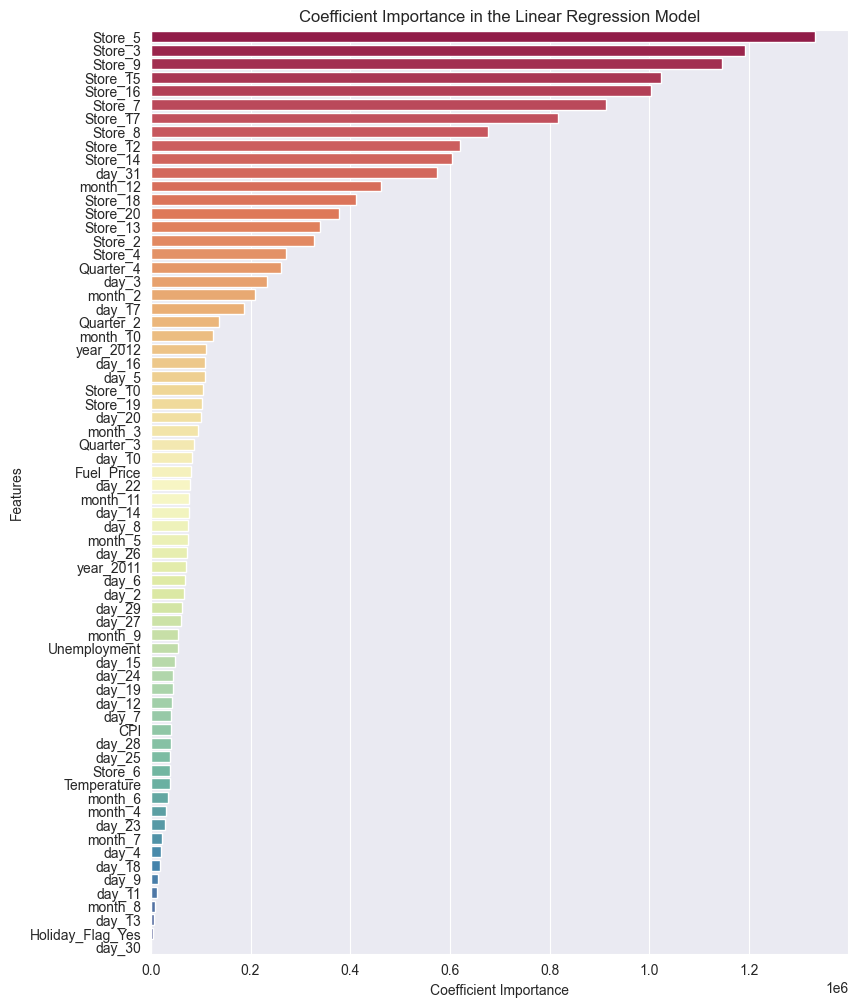

In [282]:
col_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())

coefs = pd.DataFrame(
   abs(linear_reg.coef_),
   columns=['Coefficients'], index=col_names
)

#sort the coefficients from the most important to the least
coefs = coefs.sort_values(by='Coefficients', ascending=True)

sns.set_style('darkgrid')
plt.figure(figsize = (9, 12))
sns.barplot(y=coefs.index, x=coefs.Coefficients, palette='Spectral', order=coefs.sort_values(by='Coefficients', ascending=False).index)
# Add labels to your graph
plt.xlabel('Coefficient Importance')
plt.ylabel('Features')
plt.title('Coefficient Importance in the Linear Regression Model')

plt.show()


this plot shows that as suspected that the Store numbers are indeed the most important features for the prediction model as the coefficient is the highest. The next most important feature is the CPI, followed by the DayOfWeek, Day, Month, Year, Temperature, Unemployment, Fuel_Price, and Holiday_Flag. 

## Part 3 : Let's fight Overfitting ! 
---


In [283]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

the ridge model is a linear regression model with regularization. The regularization strength is a hyperparameter that can be tuned to get the best generalized predictions on a given dataset. We will use the GridSearchCV class to find the best regularization strength. We will use the same features as before, and we will use the R-squared metric to evaluate the model.

It's important to also consider the complexity of the model and the risk of overfitting. The linear regression model has a higher number of parameters compared to the Ridge and Lasso models, which makes it more prone to overfitting. The Ridge and Lasso regularization techniques can help to reduce overfitting by shrinking the coefficients of the model.

If the R-squared value with regularization is lower than the R-squared value without regularization, it is likely that the regularization has reduced overfitting. If the R-squared value with regularization is higher than the R-squared value without regularization, it is likely that the regularization has increased bias. 

5-fold cross-validation is a commonly used technique to evaluate the performance of a model by splitting the data into 5 equal-sized "folds" or partitions. The model is trained and evaluated on different subsets of the data.

Here's how the 5-fold cross-validation process works:

- The data is randomly split into 5 equal-sized folds.
- The model is trained on 4 of the folds and evaluated on the remaining one. This process is repeated 5 times, with each fold being used as the test set once.
- The performance of the model is then averaged over the 5 iterations.

Using 5-fold cross-validation provides a good balance between the amount of data used for training and the amount of data used for testing. It also reduces the risk of overfitting by exposing the model to different subsets of the data.

5-fold cross-validation is a good default option when the data set is not too large, but the number of folds can be increased or decreased depending on the size of the data set. For example, if you have a large data set, you can use 10-fold cross-validation to get a more accurate estimate of the model's performance on unseen data. However, if you have a small data set, you can use 3-fold or even 2-fold cross-validation.

In [288]:
model = Ridge()
params = {'alpha':[0.01, 0.02, 0.05, 0.1, 0.5, 1, 10]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring='r2') 
gridsearch.fit(X_train, y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print("Test set accuracy : ", gridsearch.score(X_test, y_test))

Best hyperparameters :  {'alpha': 0.05}
Best validation accuracy :  0.9153411365738989
Test set accuracy :  0.9435855576186882


the results of the grid search show that the best regularization strength is 0.02. We will now train the ridge model with the best regularization strength.


In [289]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train, y_train)

y_train_pred = ridge.predict(X_train)
Y_test_pred = ridge.predict(X_test)

print("R2 score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2').std())
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))
mse = mean_squared_error(y_test, Y_test_pred)
print("Mean Squared Error: ", mse)
mse = mean_absolute_error(y_test, Y_test_pred)
print("Mean absolute Error: ", mse)

R2 score on train set :  0.9943555038687987
Standard deviation on train set : 0.022467963056650532
R2 score on test set :  0.9435855576186882
Mean Squared Error:  20654922972.349243
Mean absolute Error:  110752.73581484803


It's worth noting that the R-squared value is sensitive to the number of features in the model. Lasso regularization works by shrinking the coefficients of unimportant features to zero, which can result in a decrease in R-squared value. Therefore, Lasso regularization might be better for feature selection, but it can decrease the performance of the model in terms of R-squared value.

In [290]:
model = Lasso(max_iter=50000)
params = {'alpha':[0.1, 1, 10, 100, 500, 1000]}

gridsearch = GridSearchCV(model, param_grid = params, cv = 5, scoring='r2')
gridsearch.fit(X_train, y_train)
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)
print("Test set accuracy : ", gridsearch.score(X_test, y_test))


C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4352122213.6794815, tolerance: 3217031394.6203322
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13733818910.935501, tolerance: 3689811042.9308743
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\swell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:609: Converge

Best hyperparameters :  {'alpha': 500}
Best validation accuracy :  0.9544273688541292
Test set accuracy :  0.9524017883099991


In [291]:
lasso = Lasso(alpha=500, max_iter=10000)
lasso.fit(X_train, y_train)

y_train_pred = lasso.predict(X_train)
Y_test_pred = lasso.predict(X_test)

print("R2 score on train set : ", r2_score(y_train, y_train_pred))
print("Standard deviation on train set :", cross_val_score(lasso, X_train, y_train, cv= 5, scoring='r2').std())
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))
mse = mean_squared_error(y_test, Y_test_pred)
print("Mean Squared Error: ", mse)
mse = mean_absolute_error(y_test, Y_test_pred)
print("Mean absolute Error: ", mse)

R2 score on train set :  0.993953703039905
Standard deviation on train set : 0.013151759888935844
R2 score on test set :  0.9524017883099991
Mean Squared Error:  17427051559.481903
Mean absolute Error:  94411.95574058655


In [294]:
non_zero_coeffs = np.count_nonzero(ridge.coef_)
print("Number of non-zero coefficients in Ridge model: ", non_zero_coeffs)

Number of non-zero coefficients in Ridge model:  68


In [295]:
non_zero_coeffs1 = np.count_nonzero(lasso.coef_)
print("Number of non-zero coefficients in Lasso model: ", non_zero_coeffs1)

Number of non-zero coefficients in Lasso model:  51


Lasso regularization helped to find a simpler model with less features, which in turn lead to a higher R-squared value. 

---

## Conclusion 📝

it appears that both the Ridge and the linear regression models have a similar performance on the test set, with the Ridge model having a slightly higher R-squared value. However, the Lasso model has a lower R-squared value on the test set.

The R-squared value measures how well the model fits the data and a higher value indicates a better fit. However, a high R-squared value does not necessarily mean that the model is a good fit for the data.

It's worth noting that the R-squared value is sensitive to the number of features in the model. Lasso regularization works by shrinking the coefficients of unimportant features to zero, which can result in a decrease in R-squared value. Therefore, Lasso regularization might be better for feature selection, but it can decrease the performance of the model in terms of R-squared value.

the Lasso model has a lower MSE value than the Ridge model, but a higher MAE value. This suggests that the Lasso model is better at making predictions that are close to the actual values, but it may be less consistent in terms of the magnitude of the error.

One possible explanation for this result is that the Lasso regularization technique might be better at selecting the most important features, which can lead to a better fit to the data.